# Deep Learning: Ex.1 - Single neuron

Submitted by: Noam Bassat


In [510]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


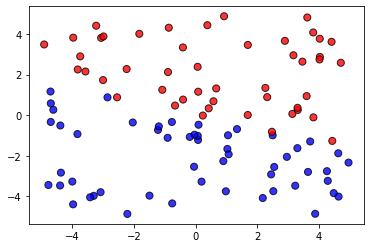

In [511]:
def generate_data (n=100):
    w = np.array([1,3]) 
    n = 100
    X = np.random.random((n,2))*10-5 # random numbers between [-5,5]
    z = np.dot(X,w)
    g = 1/(1+np.exp(-z)) # sigmoid function
    y = np.zeros(n)
    y[g>0.5] = 1
    return X,y

X,y = generate_data()

plt.scatter(X[:,0],X[:,1],s=50,c=y, cmap='bwr', alpha=0.8, edgecolor='k')
plt.show()


### Gradient descent algorithm

- Implement the gradiet descent algorithm, based on the logistic loss as presented in class.

The function should start with an intial guess of $\vec{w}=(0,...,0)$ and perform $T$ update steps (with a learning rate of $\alpha$). At each step $t$ calculate the total loss $J_t=\sum_i{l_i}$ over all samples.

The function should return:

1. the final weight vector $\vec{w}$

2. all the history values of J:
$$ J = [J_1, J_2, ..., J_T] $$

3. all the history values of  $\vec{w}$:
$$ w_{history} = [\vec{w}_1,\vec{w}_2, ... \vec{w}_T ]$$


In [512]:
x[1]

-9.757575757575758

In [534]:
def gradient_descent (X, y, alpha, T):
    n,d = X.shape
    w = np.zeros(d) # init w 
    w_history = np.zeros((T,d))
    J_history = np.zeros(T) 

    for t in range(T):
#         w = w[t]
        z = X.dot(w)
        yhat = 1/(1+np.exp(-z))
        loss = -y*np.log(yhat) - (1-y)*np.log(1-yhat)
        J_history[t] = sum(np.dot(X.T, (yhat-y)))
        w = w - alpha*(sum((yhat-y))*X[t])
        w_history[t] = w
#         z = w1*x1 + w2*x2
#         g = 1/(1+np.exp(-z)) # sigmoid 
#         z = X.dot(w)
       
#         yhat = g(X.dot(w))
#         np.dot(X.T, yhat-y)
            
#         
#         w_history[t] = w[t]
# loss = -y*np.log(yhat) - (1-y)*np.log(1-yhat) # logistic loss
# loss.shape
    return w, J_history, w_history



- run your function on the 2D data we generated.
- plot the history values of J. 
- if J didn't converge, change the values of $\alpha$ or $T$.

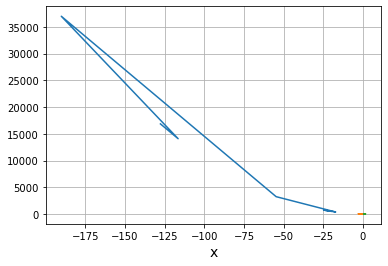

In [535]:
def f (x):
    return (x-2)**2+20
w, J_history, w_history  = gradient_descent (X, y, 0.1,30)
x = np.linspace(-10,14,100)
plt.plot(J_history,f(J_history))
plt.plot(w_history,f(w_history))
# plt.plot(J_history, f(J_history),'.-r')
plt.xlabel('x',fontsize=14)
plt.grid()

- use the visualization provided in class, to plot the data points on top of the blue-white-red separation plane. 

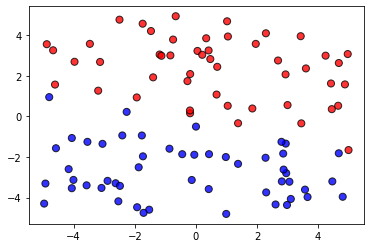

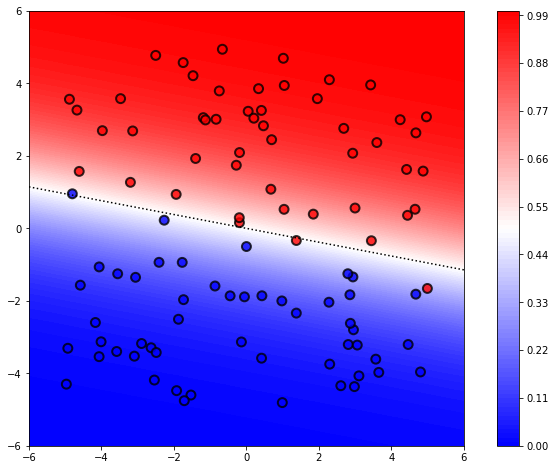

In [536]:
X,y = generate_data()

plt.scatter(X[:,0],X[:,1],s=50,c=y, cmap='bwr', alpha=0.8, edgecolor='k')
plt.show()
w1, w2 = w
x1_set = np.linspace(-6, 6, num=50)
x2_set = np.linspace(-6, 6, num=50)
x1,x2 = np.meshgrid(x1_set, x2_set)
z = w1*x1 + w2*x2
g = 1/(1+np.exp(-z)) # sigmoid 
plt.figure(figsize=(10,8))
plt.contourf(x1_set,x2_set,g,levels=100, cmap='bwr', vmin=0, vmax=1)
plt.colorbar()
plt.contour(x1_set,x2_set,g, levels=[0.5], colors='black',linestyles=':')
plt.scatter(X[:,0], X[:,1], s=80, c=y, cmap='bwr', alpha=0.8, edgecolor='k',linewidth=2)
plt.axis('square')
plt.show()


- calculate $\hat{y}_i$ for all samples, using the final weight vector you found.
- assume $\hat{y}_i > 0.5$ implies a label of `1` and `0` otherwise. how many of the samples classified correctly?

In [537]:
count = 0 

for i,w in enumerate(w_history):
    z = X[i].dot(w)
    y_hat = 1/(1+np.exp(-z))
    if(y_hat>0.5 and y[i]==1):
        count+=1
    if(y_hat<=0.5 and y[i]==0):
        count+=1
count

30

11

- remember to fill in your names on the top of this notebook.
- submit a single `ipynb` file in moodle.

## Good Luck!